In [1]:
from celeste_image_edit import create_image_editor
from celeste_image_edit.core.enums import ImageEditProvider, GoogleEditModel

image_edit_provider = ImageEditProvider.GOOGLE
image_edit_model = GoogleEditModel.FLASH_2_0_PREVIEW_IMAGEN
image_editor = create_image_editor(
    provider=image_edit_provider.value,
    model=image_edit_model.value
)

In [2]:
from celeste_image_edit.core.types import Image

prompt = "Put the image in black and white"
image = Image(path='/Users/kamilbenkirane/Desktop/Projects/Learning/celeste/celeste-image-edit/data/bqimage.jpg')


In [3]:
response = await image_editor.edit_image(prompt=prompt, image=image)

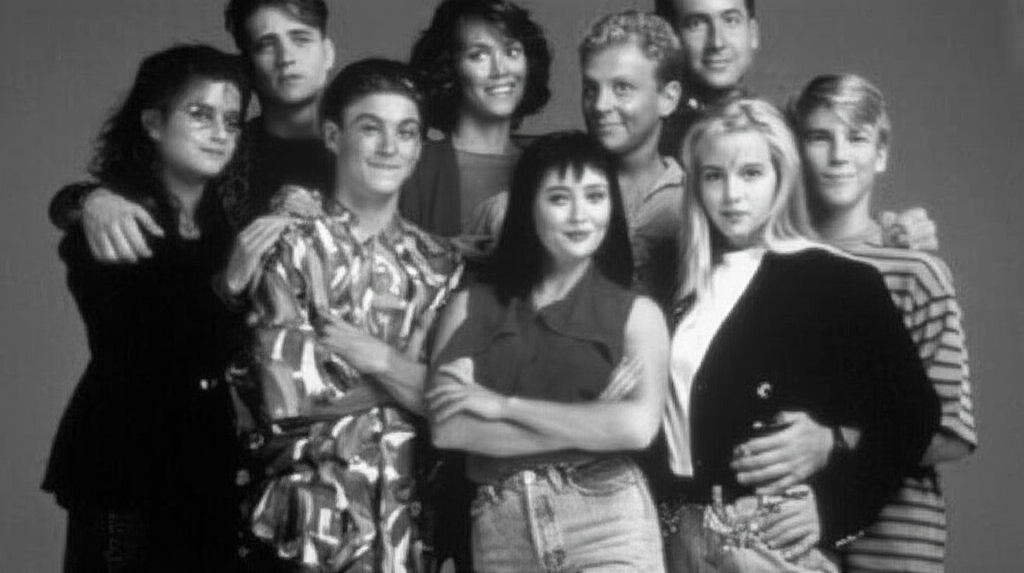

In [4]:
import PIL
from io import BytesIO
PIL.Image.open(BytesIO(response.data))

In [5]:
model_list_response = await image_editor.client.aio.models.list()
[m.name.split('/')[1] for m in model_list_response._page]

['embedding-gecko-001',
 'gemini-1.0-pro-vision-latest',
 'gemini-pro-vision',
 'gemini-1.5-pro-latest',
 'gemini-1.5-pro-002',
 'gemini-1.5-pro',
 'gemini-1.5-flash-latest',
 'gemini-1.5-flash',
 'gemini-1.5-flash-002',
 'gemini-1.5-flash-8b',
 'gemini-1.5-flash-8b-001',
 'gemini-1.5-flash-8b-latest',
 'gemini-2.5-pro-preview-03-25',
 'gemini-2.5-flash-preview-04-17',
 'gemini-2.5-flash-preview-05-20',
 'gemini-2.5-flash',
 'gemini-2.5-flash-preview-04-17-thinking',
 'gemini-2.5-flash-lite-preview-06-17',
 'gemini-2.5-pro-preview-05-06',
 'gemini-2.5-pro-preview-06-05',
 'gemini-2.5-pro',
 'gemini-2.0-flash-exp',
 'gemini-2.0-flash',
 'gemini-2.0-flash-001',
 'gemini-2.0-flash-exp-image-generation',
 'gemini-2.0-flash-lite-001',
 'gemini-2.0-flash-lite',
 'gemini-2.0-flash-preview-image-generation',
 'gemini-2.0-flash-lite-preview-02-05',
 'gemini-2.0-flash-lite-preview',
 'gemini-2.0-pro-exp',
 'gemini-2.0-pro-exp-02-05',
 'gemini-exp-1206',
 'gemini-2.0-flash-thinking-exp-01-21',
 '

In [5]:
import os
from celeste_image_edit.core.config import HUGGINGFACE_TOKEN
from huggingface_hub import InferenceClient

client = InferenceClient(
    provider="auto",
    api_key=HUGGINGFACE_TOKEN,
)

with open("/Users/kamilbenkirane/Desktop/Projects/Learning/celeste/celeste-image-edit/data/bqimage.jpg", "rb") as image_file:
   input_image = image_file.read()

# output is a PIL.Image object
image = client.image_to_image(
    input_image,
    prompt="change the background in yellow",
    model="black-forest-labs/FLUX.1-Kontext-dev",
)

ValueError: Task 'image-to-image' not supported for provider 'fal-ai'. Available tasks: ['automatic-speech-recognition', 'text-to-image', 'text-to-speech', 'text-to-video']

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
import replicate


input = {
    "prompt": "Make this a 90s cartoon",
    "input_image": "https://replicate.delivery/pbxt/N55l5TWGh8mSlNzW8usReoaNhGbFwvLeZR3TX1NL4pd2Wtfv/replicate-prediction-f2d25rg6gnrma0cq257vdw2n4c.png",
    "output_format": "jpg"
}

output = replicate.run(
    "black-forest-labs/flux-kontext-pro",
    input=input,
)
with open("output.jpg", "wb") as file:
    file.write(output.read())
#=> output.jpg written to disk

ReplicateError: ReplicateError Details:
title: Unauthenticated
status: 401
detail: You did not pass an authentication token

In [5]:
from celeste_image_edit.core.config import REPLICATE_API_TOKEN
import replicate

# Create client with API token
client = replicate.Client(api_token=REPLICATE_API_TOKEN)

input = {
    "prompt": "Make this a 90s cartoon",
    "input_image": "https://replicate.delivery/pbxt/N55l5TWGh8mSlNzW8usReoaNhGbFwvLeZR3TX1NL4pd2Wtfv/replicate-prediction-f2d25rg6gnrma0cq257vdw2n4c.png",
    "output_format": "jpg"
}

output = client.run(
    "black-forest-labs/flux-kontext-pro",
    input=input,
)

with open("output.jpg", "wb") as file:
    file.write(output.read())

In [7]:
output.read()

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xeb[jJP\x02\x11\x00\x00\x00\x01\x00\x00[`jumb\x00\x00\x00\x1ejumdc2pa\x00\x11\x00\x10\x80\x00\x00\xaa\x008\x9bq\x03c2pa\x00\x00\x00[:jumb\x00\x00\x00Gjumdc2ma\x00\x11\x00\x10\x80\x00\x00\xaa\x008\x9bq\x03urn:uuid:14f086cc-72eb-4455-9570-c6a7ee66524a\x00\x00\x00\x1b\xcejumb\x00\x00\x00)jumdc2as\x00\x11\x00\x10\x80\x00\x00\xaa\x008\x9bq\x03c2pa.assertions\x00\x00\x00\x18\xb3jumb\x00\x00\x003jumd@\xcb\x0c2\xbb\x8aH\x9d\xa7\x0b*\xd6\xf4\x7fCi\x03c2pa.thumbnail.claim.jpeg\x00\x00\x00\x00\x14bfdb\x00image/jpeg\x00\x00\x00\x18dbidb\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x14\x0e\x0f\x12\x0f\r\x14\x12\x10\x12\x17\x15\x14\x18\x1e2!\x1e\x1c\x1c\x1e=,.$2I@LKG@FEPZsbPUmVEFd\x88emw{\x81\x82\x81N`\x8d\x97\x8c}\x96s~\x81|\xff\xdb\x00C\x01\x15\x17\x17\x1e\x1a\x1e;!!;|SFS||||||||||||||||||||||||||||||||||||||||||||||||||\xff\xc0\x00\x11\x08\x00\x8a\x01\x00\x03\x01"\x00\x02\x11\x01\x03